In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm


In [ ]:
df=pd.read_csv("loan.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

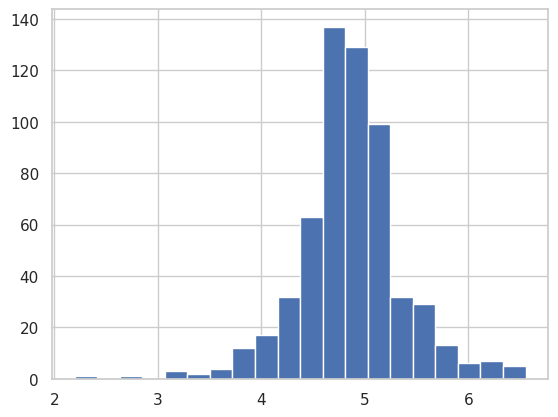

In [ ]:
df["loanAmount_log"]=np.log(df["LoanAmount"])
df["loanAmount_log"].hist(bins=20)


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log       22
dtype: int64

<Axes: >

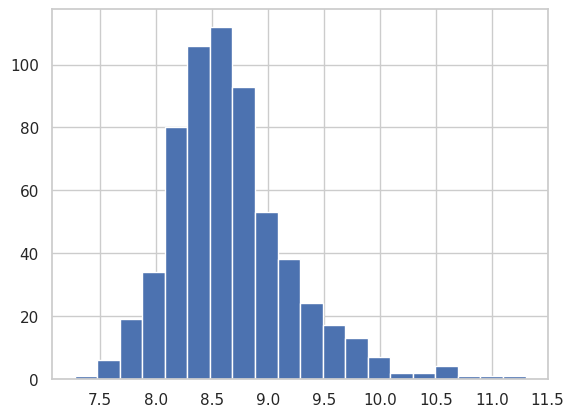

In [ ]:
df["TotalIncome"]=df["ApplicantIncome"]+df["CoapplicantIncome"]
df["TotalIncome_log"]=np.log(df["TotalIncome"])
df["TotalIncome_log"].hist(bins=20)

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log=df.loanAmount_log.fillna(df.loanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [ ]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values

x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [ ]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [ ]:
print("person of missing gender is %2f%%" %((df['Gender'].isnull().sum()/df.shape[0])*100))

person of missing gender is 0.000000%


number of people who take loan as group by gender:
Male      502
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

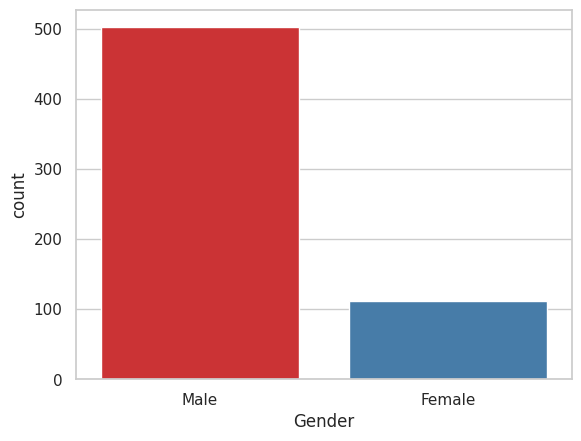

In [ ]:
print("number of people who take loan as group by gender:")
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df,palette='Set1')

number of people who take loan as group by marital status:
Yes    401
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

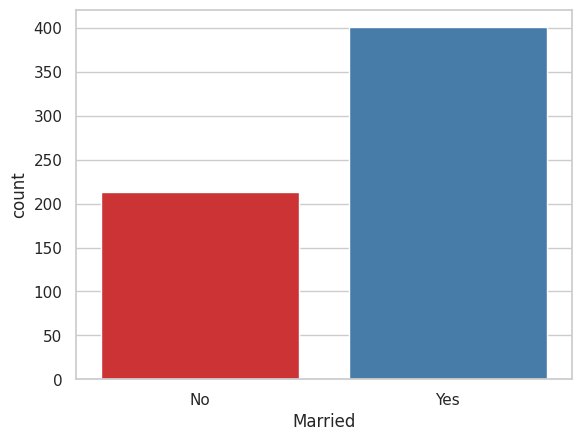

In [ ]:
print("number of people who take loan as group by marital status:")
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df,palette='Set1')

number of people who take loan as group by dependents:
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

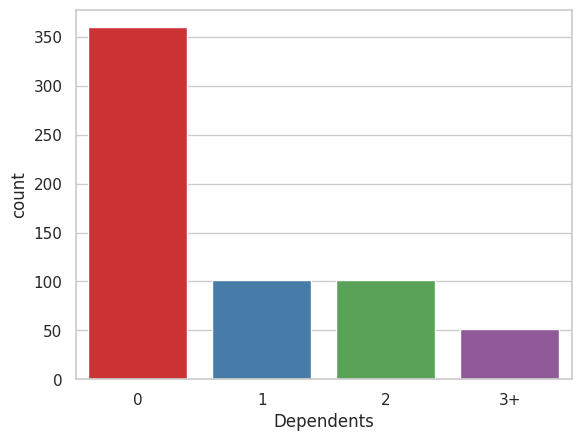

In [ ]:
print("number of people who take loan as group by dependents:")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df,palette='Set1')

number of people who take loan as group by self employed:
No     532
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

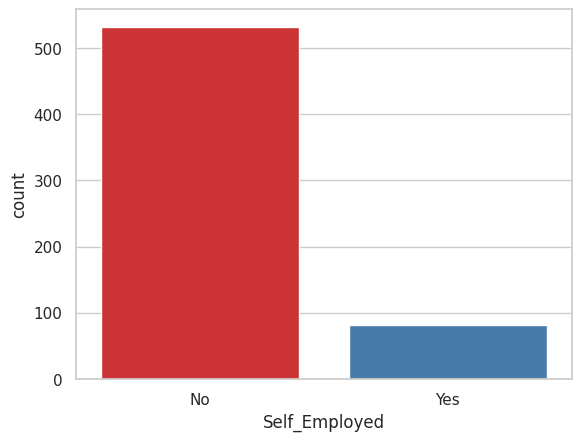

In [ ]:
print("number of people who take loan as group by self employed:")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=df,palette='Set1')

number of people who take loan as group by loan amount:
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

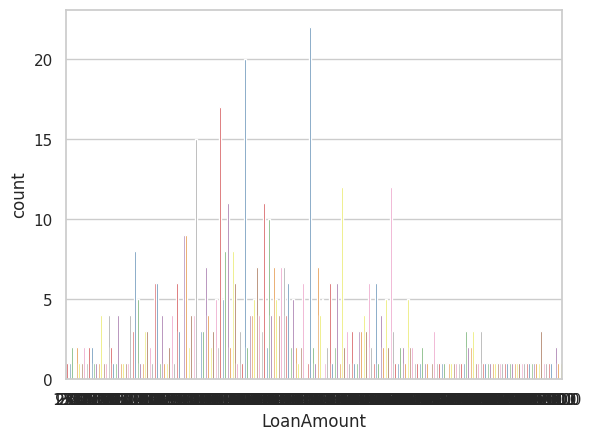

In [ ]:
print("number of people who take loan as group by loan amount:")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount',data=df,palette='Set1')

number of people who take loan as group by Credit history:
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

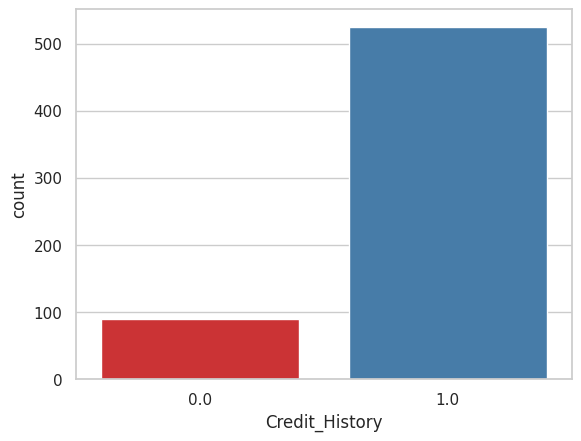

In [ ]:
print("number of people who take loan as group by Credit history:")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=df,palette='Set1')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

from sklearn.preprocessing import LabelEncoder
LabelEncoder_x=LabelEncoder()



In [ ]:
#fit and transform data for training

for i in range(0,5):
  x_train[:,i]=LabelEncoder_x.fit_transform(x_train[:,i])
  x_train[:,7]=LabelEncoder_x.fit_transform(x_train[:,7])

x_train

array([[1, 0, 0, ..., 1.0, 5.730099782973574, 367],
       [1, 1, 0, ..., 1.0, 4.955827057601261, 295],
       [1, 1, 0, ..., 1.0, 4.74493212836325, 131],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 321],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 241],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 268]], dtype=object)

In [ ]:
LabelEncoder_y=LabelEncoder()
y_train=LabelEncoder_y.fit_transform(y_train)



In [ ]:
for i in range(0,5):
  x_test[:,i]=LabelEncoder_x.fit_transform(x_test[:,i])
  x_test[:,7]=LabelEncoder_x.fit_transform(x_test[:,7])

x_test

array([[1, 0, 0, ..., 1.0, 4.430816798843313, 126],
       [0, 0, 0, ..., 1.0, 4.718498871295094, 46],
       [1, 1, 0, ..., 1.0, 5.780743515792329, 153],
       ...,
       [0, 1, 0, ..., 1.0, 3.58351893845611, 12],
       [1, 1, 0, ..., 1.0, 5.135798437050262, 16],
       [1, 0, 0, ..., 1.0, 4.624972813284271, 74]], dtype=object)

In [ ]:
LabelEncoder_y=LabelEncoder()
y_test=LabelEncoder_y.fit_transform(y_test)

y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.preprocessing import StandardScaler
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

In [ ]:
# y_pred=nb_clf.predict(x_test)

# print("acc of GaussianNB clf is",metrics.accuracy_score(y_pred,y_test))
# def make_prediction(model, input_data):
#     # Reshape input data
#     input_data_reshaped = np.asarray(input_data).reshape(1, -1)

#     # Standardize input data
#     std_data = StandardScaler().fit_transform(input_data_reshaped)

#     # Make prediction
#     prediction = model.predict(std_data)

#     # Return the prediction
#     return prediction[0]

# # Example usage
# input_data = (1, 1, 0, 0, 9, 1.0, 4.962844630259907, 73)
# prediction = make_prediction(nb_clf, input_data)

# if prediction == 1:
#     print('Loan approved')
# else:
#     print('Loan not approved')


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

# Support Vector Machine Classifier
svm_clf = SVC()
svm_clf.fit(x_train, y_train)

# Gaussian Naive Bayes Classifier
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)

# Logistic Regression Classifier
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)

# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

# k-Nearest Neighbors Classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)


# Function to evaluate a classifier
def evaluate_classifier(clf, x_test, y_test):
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    precision = precision_score(y_test, y_pred)*100
    recall = recall_score(y_test, y_pred)*100
    f1 = f1_score(y_test, y_pred)*100
    conf_matrix = confusion_matrix(y_test, y_pred)
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])*100

    print(f"Classifier: {clf.__class__.__name__}")
    print("resultant array:",y_pred)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Specificity:", specificity)
    print("Confusion Matrix:\n", conf_matrix)
    print("\n" + "="*40 + "\n")

# Evaluate each classifier
evaluate_classifier(dt_clf, x_test, y_test)
evaluate_classifier(svm_clf, x_test, y_test)
evaluate_classifier(nb_clf, x_test, y_test)
evaluate_classifier(lr_clf, x_test, y_test)
evaluate_classifier(rf_clf, x_test, y_test)
evaluate_classifier(knn_clf, x_test, y_test)



Classifier: DecisionTreeClassifier
resultant array: [1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1
 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1
 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1]
Accuracy: 70.27027027027027
Precision: 81.6
Recall: 76.11940298507463
F1 Score: 78.76447876447877
Specificity: 54.90196078431373
Confusion Matrix:
 [[ 28  23]
 [ 32 102]]


Classifier: SVC
resultant array: [1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1

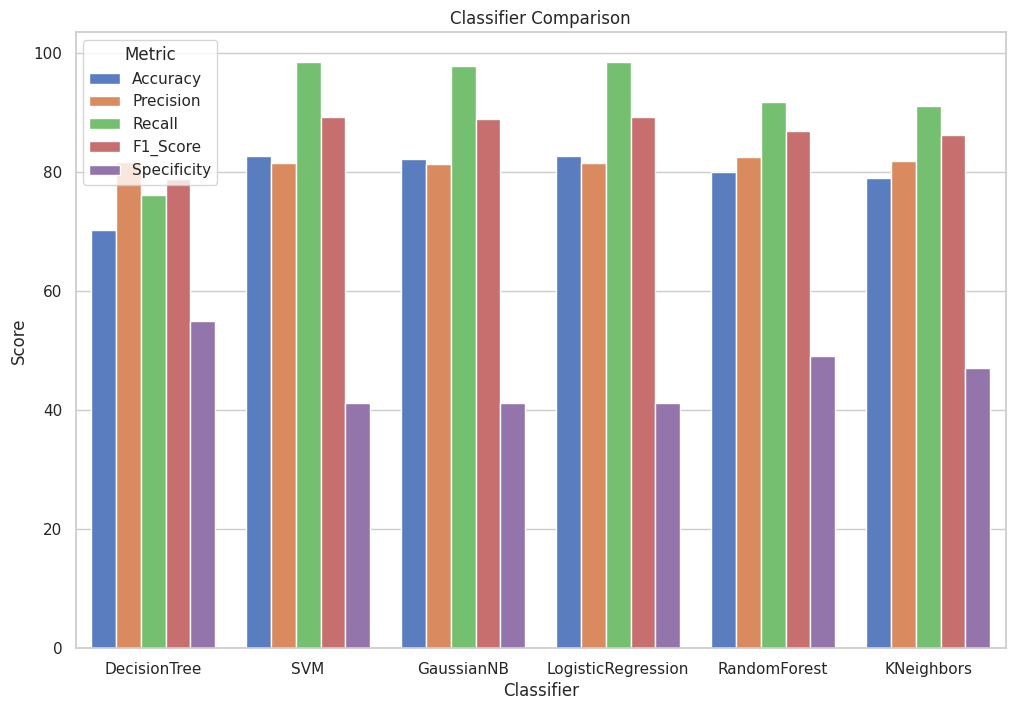

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Results from your classifiers
data = {
    'Classifier': ['DecisionTree', 'SVM', 'GaussianNB', 'LogisticRegression', 'RandomForest', 'KNeighbors'],
    'Accuracy': [70.27, 82.70, 82.16, 82.70, 80.00, 78.92],
    'Precision': [81.60, 81.48, 81.37, 81.48, 82.55, 81.88],
    'Recall': [76.12, 98.51, 97.76, 98.51, 91.79, 91.04],
    'F1_Score': [78.76, 89.19, 88.81, 89.19, 86.93, 86.22],
    'Specificity': [54.90, 41.18, 41.18, 41.18, 49.02, 47.06]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame to make it suitable for Seaborn
df_melted = pd.melt(df, id_vars=['Classifier'], var_name='Metric', value_name='Value')

# Set Seaborn style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Classifier', y='Value', hue='Metric', data=df_melted, palette="muted")

# Adjust layout
plt.title('Classifier Comparison')
plt.ylabel('Score')
plt.show()

